## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import copy

## Opening the CSV Files 

In [2]:
dataframes = [pd.read_csv(file, sep=',', index_col=0) for file in sorted(glob.glob('../preprocessed_datasets' + "/*."+'csv'))]
cohorts = [file.strip(".csv") for file in sorted(os.listdir('../preprocessed_datasets'))]

In [3]:
# reduce to BL visit only
all_cohorts = dict()
for name, df in zip(cohorts, dataframes):
    all_cohorts[name] = df.loc[df["Visit"] == 1]

In [4]:
for i in all_cohorts:
    if 'Race' not in all_cohorts[i].columns:
        print(i)

## Compute the Ethnoracial Composition

In [5]:
def cat_stat_df(dfs, result, col):
    """compute the number of participants with a certain ethnicity and store results in a table"""

    for cohort in dfs:

        calc_dict = dict()
        df = dfs[cohort]
        
        # check whether there is information regarding the ethnicity 
        if df[col].isna().all() == False:
            ca = Counter(df[col].dropna())
            calc_dict[cohort] = ca
            cohort_df = pd.DataFrame(calc_dict).transpose()
            
            # store the results into a table for the respective cohort
            for colu in cohort_df.columns:
                result.loc[cohort][colu] = cohort_df.loc[cohort, colu]
              
    return result

In [6]:
# ethnicity categories
cols = ['White', 'Black', 'Asian', 'Latin/Hispanic', 'Other', 'Native American']

# make a table to store the results 
results = pd.DataFrame(index = all_cohorts.keys(), columns = [cols])
# results.index.name = 'Name of Dataset'

cat_stat_df(all_cohorts, results, 'Race')
results.loc['TOTAL'] = results.sum()

# drop empty rows
results.dropna(axis=0, how='all', inplace=True)

### Save to CSV

In [7]:
results

,White,Black,Asian,Latin/Hispanic,Other,Native American
A4,6176,339,291,NaN,54,19
ABVIB,190,20,30,5,3,1
ADNI,1985,108,45,88,19,4
ANM,1308,10,8,NaN,35,NaN
ARWIBO,2617,NaN,NaN,NaN,NaN,NaN
DOD-ADNI,176,15,3,6,7,3
EDSD,474,NaN,NaN,NaN,NaN,NaN
EPAD,1597,3,7,13,6,NaN
I-ADNI,262,NaN,NaN,NaN,NaN,NaN
JADNI,NaN,NaN,567,NaN,NaN,NaN


In [8]:
results.to_csv("../adata_resources/ethnicity_df.csv")

## Pie Chart

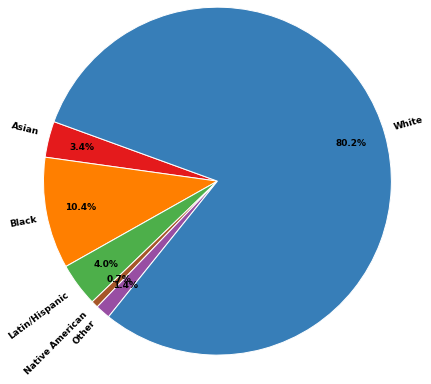

In [9]:
colors = ['#e41a1c', '#ff7f00', '#4daf4a', '#a65628', '#984ea3', '#377eb8']

# Plot
plt.pie(results.loc['TOTAL'].sort_index(), labels=results.columns.levels[0], colors=colors,
        autopct='%1.1f%%', startangle=160, pctdistance=0.80, labeldistance=1.05, radius=(2), rotatelabels=True, 
        wedgeprops={"edgecolor":"white", 'linewidth':1, 'antialiased':True}, 
        textprops={'fontsize':9, 'weight':"bold"})

# save the plot as a png file
plt.savefig('../Figures/RACE.png', dpi=300, bbox_inches='tight')
plt.show()

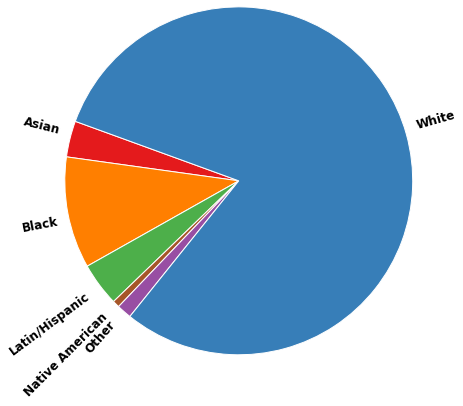

In [10]:
# Plot
plt.pie(results.loc['TOTAL'].sort_index(), labels=results.columns.levels[0], colors=colors,
        autopct=None, startangle=160, pctdistance=0.80, labeldistance=1.05, radius=(2), rotatelabels=True, 
        wedgeprops={"edgecolor":"white", 'linewidth':1, 'antialiased':True}, 
        textprops={'fontsize':12, 'weight':"bold"})

# save the plot as a png file 
plt.savefig('../Figures/RACE2.png', dpi=300, bbox_inches='tight')
plt.show()